# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/polynomial_regression


In [18]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
random.seed(0)

## Defining our dataset

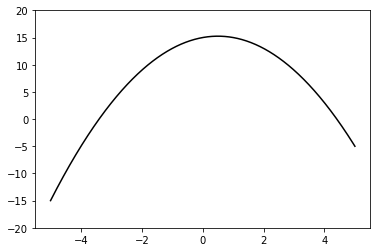

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

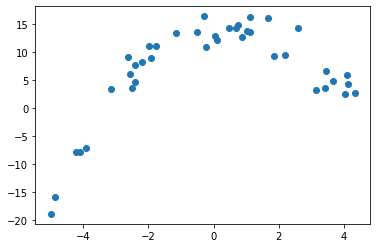

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [16]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
  ## TODO ##
  #use sklearn (PolynomialFeatures method)
  poly = PolynomialFeatures(200, include_bias=False)
  X = poly.fit_transform(X.reshape(-1,1))
  return X
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])

## Splitting data into training and testing

In [19]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, train_size=.8)

In [20]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [27]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize=True).fit(X_train, y_train)

Training error (rmse): 0.9664438999454906
Testing error (rmse): 2769924576.925383


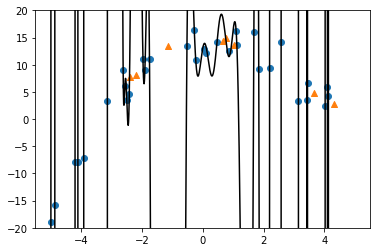

Polynomial coefficients
[13.030054280929821, 29.332022663868642, -207.6250718973844, -722.4649239985117, 3578.970477240156, 1632.591155261986, -14693.771171212902, 4687.445023328259, 19373.086294629, -9464.120175905367, -13160.88417539062, 6903.487477209959, 5404.017064084585, -2695.1789077505664, -1422.2985682967196, 623.8234607720818, 241.1126868225898, -86.97630730638086, -25.166833034974303, 6.8656076588619, 1.3966341503388962, -0.23030987232773548, -0.018123580238590925, -0.003492483689514908, -0.0014967632601124712, 0.00029082032176347726, 1.1848234543851028e-05, 8.66019301660796e-06, 2.048951178654315e-06, -1.574470493585032e-07, 5.138563717354901e-08, -1.69455305686183e-08, -6.54377033356616e-10, -4.876904583330793e-10, -9.737508312988102e-11, -1.5374929707158925e-12, -3.981491463656762e-12, 5.739392311933079e-13, -8.160716837739287e-14, 3.511363892127462e-14, 4.2132058214030004e-16, 1.2311942510195116e-15, 1.2859694998647795e-16, 3.4671399722138055e-17, 7.344626835732076e-18, 

In [28]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [38]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)
clf = linear_model.Lasso(alpha=0.1, normalize=True)
model_L1_reg = clf.fit(X_train, y_train)

Training error (rmse): 2.253757485201271
Testing error (rmse): 0.9811310696429625


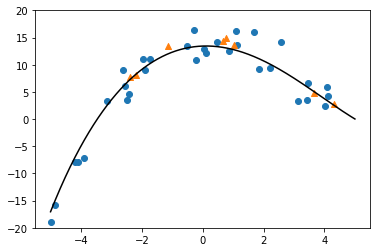

Polynomial coefficients
[13.432057317660357, 0.1947823989613315, -0.8778325286279718, 0.04703620528135537, -0.0, 0.000537291498078123, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0

In [39]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [49]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)
clf = linear_model.Ridge(alpha=0.1, normalize=True)
model_L2_reg = clf.fit(X_train, y_train)

Training error (rmse): 2.247267893917209
Testing error (rmse): 1.2227011851099443


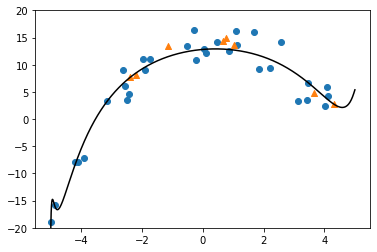

Polynomial coefficients
[12.811205076689143, 0.47132099934543387, -0.5678681717731674, 0.01708345339519762, -0.013006541276193264, 0.000806791979268593, -0.00024731670211758947, 3.266530735952261e-05, -3.499692431855597e-06, 1.0940966798623564e-06, -6.954956593941426e-09, 3.155769216786082e-08, 2.2323406642560186e-09, 7.937256956300958e-10, 1.3120202793994959e-10, 1.6531064796064382e-11, 5.775274224288377e-12, 2.084017131881798e-13, 2.3066939994902305e-13, -4.432960015970622e-15, 8.843491403476213e-15, -5.229754082012536e-16, 3.330453684227087e-16, -2.9904304332220453e-17, 1.2454529580295557e-17, -1.4176971792889455e-18, 4.649165401279516e-19, -6.170972209941493e-20, 1.7366009594468004e-20, -2.561719728063329e-21, 6.4968543238095835e-22, -1.0327707402522847e-22, 2.4346525913951444e-23, -4.084002625050884e-24, 9.136464516476032e-25, -1.5934520973197236e-25, 3.431824532002899e-26, -6.1569147151022586e-27, 1.2895931653797568e-27, -2.3615177288867454e-28, 4.8455287909108e-29, -9.0053840710

In [50]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [48]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,4.328338,2.748648,-7.834529e+09,2.459747,3.465408
1,-1.150989,13.436894,-2.316729e+03,11.972129,11.711244
2,1.031856,13.676624,1.763047e+01,12.750697,13.034720
3,0.675107,14.272553,1.820989e+01,13.178015,13.255421
4,-2.395077,7.723543,1.186813e+01,7.241365,7.479355
5,-2.181622,8.160123,1.402676e+02,8.314149,8.461707
6,0.756510,14.859288,1.460611e+01,13.097520,13.220199
7,3.653099,4.833669,4.322069e+06,5.071447,5.387142
